In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Flatten, Dense, Dropout, RNN, Input, TimeDistributed
import matplotlib.pyplot as plt

In [39]:
lst = np.load("dataset.npz")

In [40]:
print(len(list(lst)))

6


In [41]:
print(list(lst.keys()))

['x_train', 'y_train', 'x_test', 'y_test', 'box_train', 'box_test']


In [42]:
x_train = lst['x_train']
y_train = lst['y_train']
x_test = lst['x_test']
y_test = lst['y_test']
box_train = lst['box_train']
box_test = lst['box_test']

In [43]:
print(x_train.shape)
print(y_train.shape)
print(box_train.shape)
print(x_test.shape)

(10597, 120, 34)
(10597, 120, 17)
(10597, 4)
(1178, 120, 34)


In [44]:
print(x_train.shape, y_train.shape)

(10597, 120, 34) (10597, 120, 17)


In [45]:
print(x_test.shape, y_test.shape)

(1178, 120, 34) (1178, 120, 17)


In [46]:
print(box_train.shape, box_test.shape)

(10597, 4) (1178, 4)


In [47]:
y_train[0].shape

(120, 17)

In [48]:
y_train[0,:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [49]:
y_train.shape

(10597, 120, 17)

In [50]:
x_train = x_train
y_train = y_train

In [51]:
print(x_train.shape, y_train.shape)

(10597, 120, 34) (10597, 120, 17)


In [52]:
x_test = x_test
y_test = y_test

In [53]:
print(x_test.shape, y_test.shape)

(1178, 120, 34) (1178, 120, 17)


In [54]:
#y_train = np.argmax(y_train, axis = 2)
print(y_train.shape)

(10597, 120, 17)


In [55]:
y_test.shape

(1178, 120, 17)

In [56]:
#y_test = np.argmax(y_test, axis=2)

print(y_test.shape)

(1178, 120, 17)


In [57]:
y_train[0]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# model 구축

In [58]:
xInput = Input(batch_shape=(None,120,34))
xLstm = LSTM(17, return_sequences=True)(xInput)
xOutput = TimeDistributed(Dense(17))(xLstm)
model = Model(xInput, xOutput)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 34)]         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 120, 17)           3536      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 120, 17)           306       
Total params: 3,842
Trainable params: 3,842
Non-trainable params: 0
_________________________________________________________________


In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'accuracy'])
#early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=64, verbose=1)

Epoch 1/1000
166/166 [==============================] - 5s 26ms/step - loss: 0.0719 - mae: 0.1555 - accuracy: 0.2635 - val_loss: 0.0358 - val_mae: 0.0889 - val_accuracy: 0.5626
Epoch 2/1000
166/166 [==============================] - 4s 24ms/step - loss: 0.0345 - mae: 0.0854 - accuracy: 0.5604 - val_loss: 0.0321 - val_mae: 0.0805 - val_accuracy: 0.5869
Epoch 3/1000
166/166 [==============================] - 4s 25ms/step - loss: 0.0314 - mae: 0.0790 - accuracy: 0.5938 - val_loss: 0.0296 - val_mae: 0.0750 - val_accuracy: 0.6176
Epoch 4/1000
166/166 [==============================] - 5s 29ms/step - loss: 0.0290 - mae: 0.0737 - accuracy: 0.6209 - val_loss: 0.0285 - val_mae: 0.0722 - val_accuracy: 0.6287
Epoch 5/1000
166/166 [==============================] - 5s 29ms/step - loss: 0.0282 - mae: 0.0708 - accuracy: 0.6295 - val_loss: 0.0277 - val_mae: 0.0688 - val_accuracy: 0.6344
Epoch 6/1000
166/166 [==============================] - 5s 30ms/step - loss: 0.0275 - mae: 0.0683 - accuracy: 0.635

KeyboardInterrupt: 

In [83]:
pred = model.predict(x_test, batch_size=1)

In [89]:
print(pred[0][0])

[ 2.2872863e-03  7.9983234e-01  1.5815638e-02  1.2912016e-01
  2.0947114e-02  1.5257355e-02  2.2497773e-04  2.3295246e-03
  1.1120273e-02 -1.1804790e-02 -3.4952201e-03 -9.0344623e-04
  7.7807694e-05 -1.8699188e-03 -5.2215319e-02  5.4307692e-03
  4.9984664e-02]


ValueError: x and y can be no greater than 2-D, but have shapes (1152,) and (1152, 120, 17)

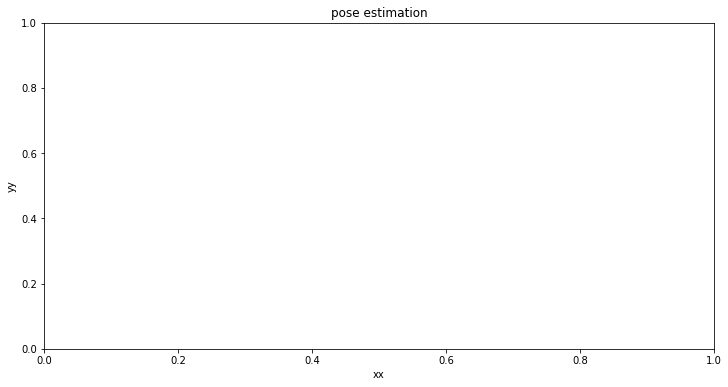

In [85]:
plt.figure(figsize=(12,6))
plt.title('pose estimation')
plt.ylabel('yy')
plt.xlabel('xx')
plt.plot(y_test, label='actual', color = 'red')
plt.plot(pred, label='prediction', color = 'green')
plt.grid()
plt.legend()

plt.show()